- Joel Konitzer
- 4/11/2022
- Week 5 / Supervised Learning
- Data Analytics

I. Introduction: This analysis aimed to demonstrate supervised machine learning using the KNN algorithm. The data that was used contained banking client details, recent contact campaign outcomes, and economic health metrics. The KNN algorithm was employed to classify client education level.

*II. Methods & Code **III. Results/Output ***IV. Analysis of Results

In [1]:
# pandas & numpy
import pandas as pd
import numpy as np

# sklearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set() 

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_full = pd.read_csv('bank-additional-full.csv', sep=";")

In [3]:
header = ['age','job','material','education','default','housing','loan','contact',
 'month','day_of_week','duration','campaign','pdays','previous','poutcome',
 'emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

In [4]:
df_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
#Create two value pairs from df to identify the datatypes and null values
def info(df):
    null_ = df.isna().any()
    dtypes = df.dtypes
    info = pd.concat([null_,dtypes], axis=1,keys=['Null','type'])
    print(info)

#Use len() function to view total df row count and shape to view row and column count
print("===========================================================================================================")
print("Number of rows:", len(df_full))
print("Shape:", df_full.shape)
print("===========================================================================================================")
print("Column quality:")
info(df_full)
print("===========================================================================================================")
print("Dataset summary statistics:")
df_full.describe().T

Number of rows: 41188
Shape: (41188, 21)
Column quality:
                 Null     type
age             False    int64
job             False   object
marital         False   object
education       False   object
default         False   object
housing         False   object
loan            False   object
contact         False   object
month           False   object
day_of_week     False   object
duration        False    int64
campaign        False    int64
pdays           False    int64
previous        False    int64
poutcome        False   object
emp.var.rate    False  float64
cons.price.idx  False  float64
cons.conf.idx   False  float64
euribor3m       False  float64
nr.employed     False  float64
y               False   object
Dataset summary statistics:


,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


There are not any null values in the numeric data columns so I'll create a heatplot to look for correlations.

I'll separate numeric and categorical columns into separate dataframes to view categorical data values.

In [6]:
df_full_cat = df_full.select_dtypes(exclude=[np.number])
df_full_num = df_full.select_dtypes(include=[np.number])

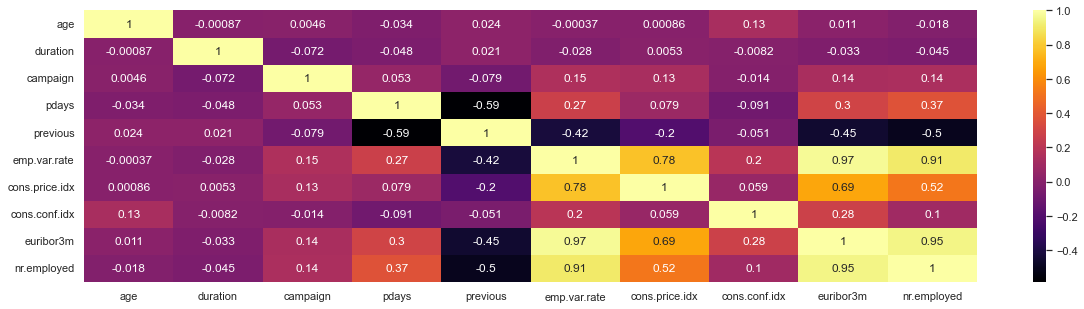

In [7]:
## Numeric column EDA
f = plt.figure(figsize=(20, 5))
sns.heatmap(df_full_num.corr(), cmap='inferno', annot=True)
plt.show()

There appears to be a high correlation with individuals being unemployed when CPI is high. 

In [8]:
df_full_cat = df_full.select_dtypes(exclude=[np.number])
df_full_num = df_full.select_dtypes(include=[np.number])

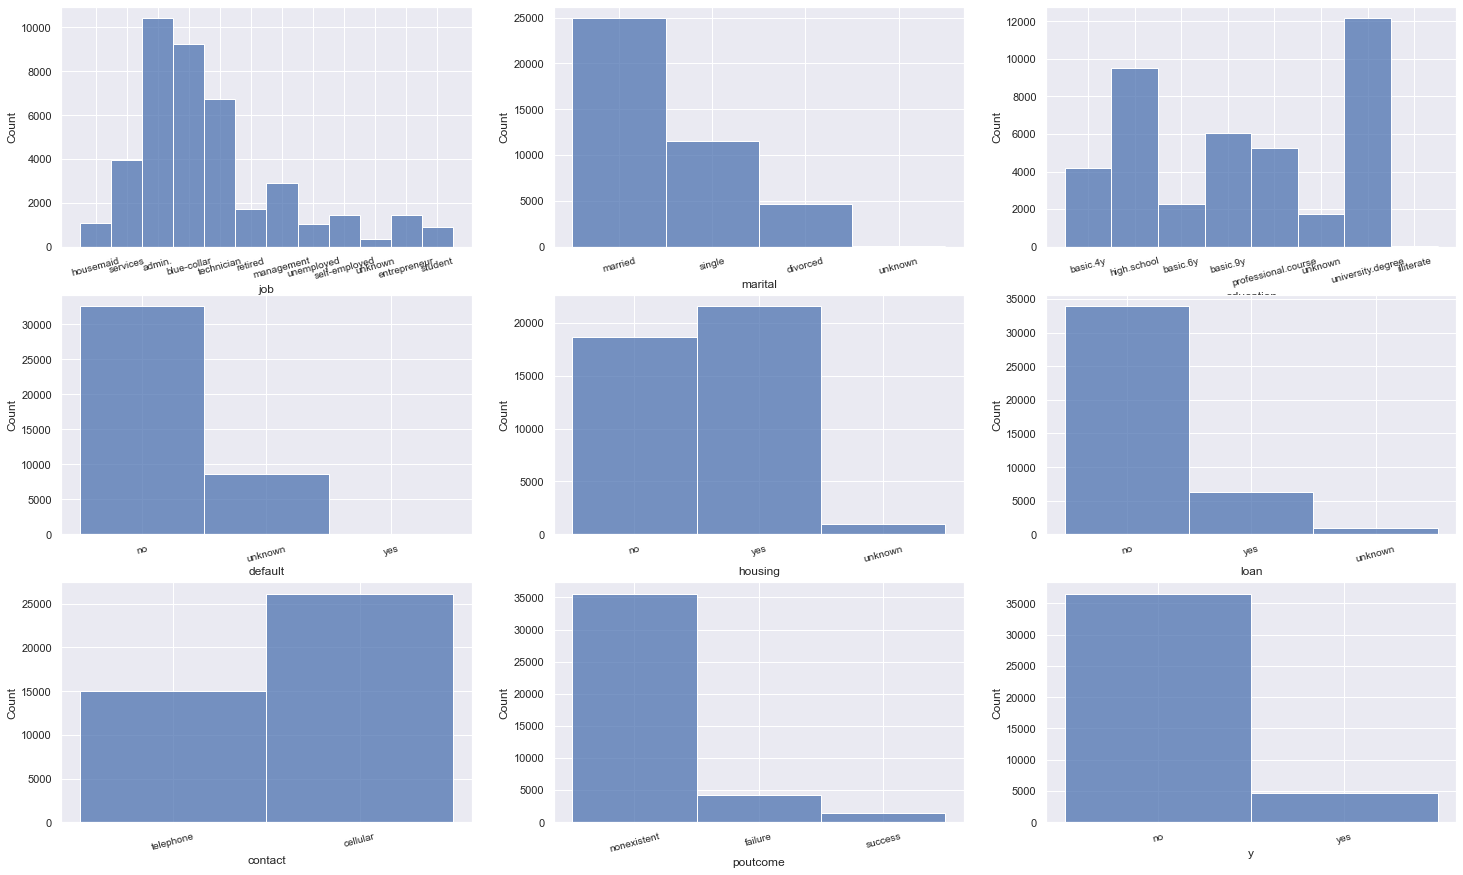

In [9]:
#Look at value distribution in categorical columns
_ = df_full_cat.drop(['month', 'day_of_week'], axis=1).copy()
plt.figure(figsize=(25,15))
cnt=1
for i in _.columns:
    plt.subplot(3,3,cnt)
    sns.histplot(_[i])
    plt.xticks(fontsize=10, rotation=15)

    cnt=cnt+1
plt.show()

In [10]:
#Remove 'unknown' values in each column to increase model specificity for complete data
df_full_cat = df_full_cat[df_full_cat != 'unknown'].copy()

In [11]:
#Use labelEncoder to transform categorical columns to numeric
from sklearn.preprocessing import LabelEncoder
#Creating the object instance
label_encoder = LabelEncoder()
for i in df_full_cat:
    df_full[i] = label_encoder.fit_transform(df_full[i])
print("Label Encoded Data: ")
df_full.head()

Label Encoded Data: 


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


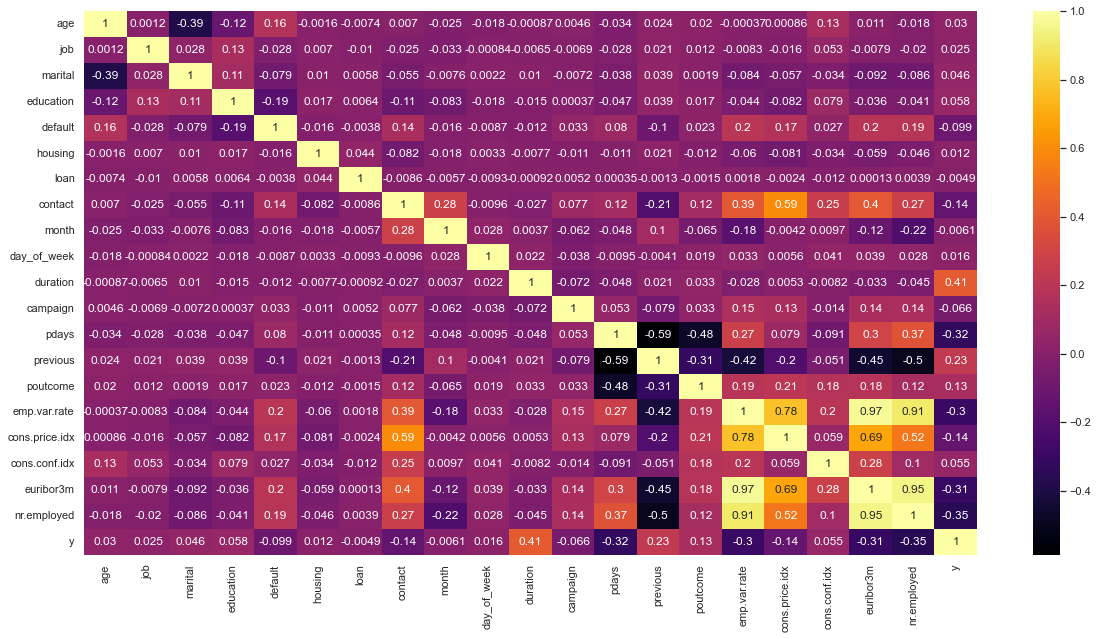

In [12]:
## Use the heatmap visual to view relationships now that the categorical values have been transformed
f = plt.figure(figsize=(20, 10))
sns.heatmap(df_full.corr(), cmap='inferno', annot=True)
plt.show()

Not many features are correlated to education. The ones that look that most promising are: marital, job have a more positive correlation while having a more negative correlation with default. I'll use these with a few others

In [13]:
df = df_full[['age', 'marital', 'education', 'default', 'y', 'duration', 'job', 'nr.employed', 'loan']].copy()

In [14]:
#Education will be our target variable
X = df.drop('education', axis=1)
y = df['education']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
scores = []

for k in range(2, 10):
    print(f'Evaluating {k} clusters')
    
    model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    model.fit(X_train,y_train)
    scores.append(model.score(X_test,y_test))

Evaluating 2 clusters
Evaluating 3 clusters
Evaluating 4 clusters
Evaluating 5 clusters
Evaluating 6 clusters
Evaluating 7 clusters
Evaluating 8 clusters
Evaluating 9 clusters


Max Accuracy:  28.793396455450353%


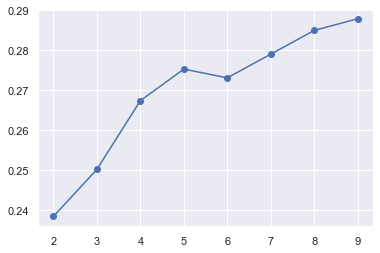

In [17]:
plt.plot(range(2,10), scores)
plt.scatter(range(2,10), scores)

plt.xticks(range(2,10))

print(f'Max Accuracy:  {(max(scores) * 100)}%')

The optimal K seems to be 9 with more clusters reuslting in higher accuracy. The accuracy rate I obtain with the data I used is 28%. To improve performance different columns should be looked at as well as applying other transformation technqiues.

=======================================================================================

Part 2: Comparison to other supervised algorithm

In [43]:
#Various required packages

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

from matplotlib import pyplot


from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [20]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#Not going to run SVC since it is too taxing on my machine
#models.append(('SVM', SVC(gamma='auto')))

In [21]:
num_folds = 5
seed = 42
scoring = 'accuracy'

In [22]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.362033 (0.003494)
LDA: 0.376722 (0.005960)
KNN: 0.280425 (0.004521)
CART: 0.401032 (0.004381)
NB: 0.353475 (0.006901)


Using other machine learning algorithms showed that Linear Discriminant Analysis to produce the highest model accuracy, followed by logistic regression. The important thing to note here is that KNN did perform the poorest out of all other algorithms.

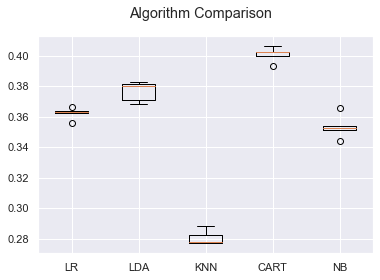

In [23]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Use standardscaler to attempt and improve model performanceX = df.drop('education', axis=1)
y = df['education']

In [25]:
X = df.drop('education', axis=1)
y = df['education']

In [36]:
# import libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# normalize daa with MinMaxScaler
mms = MinMaxScaler()
X_mms = mms.fit_transform(X)

# reduce dimensionality with PCA
print('Number of features before PCA: {}'.format(len(X_mms[0])))
pca = PCA(.9)
X_pca = pca.fit_transform(X_mms)
print('Number of features after PCA: {}'.format(len(X_pca[0])))

Number of features before PCA: 8
Number of features after PCA: 6


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [38]:
scores = []

for k in range(2, 10):
    print(f'Evaluating {k} clusters')
    
    model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    model.fit(X_train,y_train)
    scores.append(model.score(X_test,y_test))

Evaluating 2 clusters
Evaluating 3 clusters
Evaluating 4 clusters
Evaluating 5 clusters
Evaluating 6 clusters
Evaluating 7 clusters
Evaluating 8 clusters
Evaluating 9 clusters


Max Accuracy:  47.25661568341831%


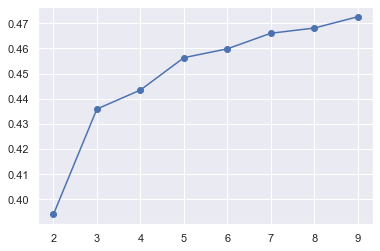

In [39]:
plt.plot(range(2,10), scores)
plt.scatter(range(2,10), scores)

plt.xticks(range(2,10))

print(f'Max Accuracy:  {(max(scores) * 100)}%')

In [40]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#Not going to run SVC since it is too taxing on my machine
#models.append(('SVM', SVC(gamma='auto')))

In [41]:
num_folds = 5
seed = 42
scoring = 'accuracy'

In [42]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.357117 (0.006426)
LDA: 0.370076 (0.008307)
KNN: 0.460728 (0.006224)
CART: 0.409924 (0.005686)
NB: 0.354385 (0.007776)


After standardizing the dataset, we see that using KNN results in our best performing model.

V. Conclusion 
This analysis showed that education level is not as simple to classify as I assumed. The results showed a low accuracy when using KNN, and then when applied to other algorithms, the results were still low. The significant takeaway from this lab was that a 10% increase in model accuracy was achieved when standardizing the dataset. This lab demonstrated that it is essential to consider other algorithms to baseline model performance and that the original data may need extensive transformation to achieve adequate performance.   


VI. Sources
- Donnelly, H. (2021, October 4). Machine learning used to build a diversified portfolio: K-means clustering. Medium. Retrieved April 11, 2022, from https://medium.com/analytics-vidhya/machine-learning-used-to-build-a-diversified-portfolio-k-means-clustering-ee91cb9ae59e 
- Ye, A. (2020, May 28). Customer segmentation tutorial: Data science in the industry. Medium. Retrieved April 11, 2022, from https://medium.com/analytics-vidhya/customer-segmentation-tutorial-data-science-in-the-industry-a6b486f0b0b0 